# Polarization math:  Jones vectors and matrices
Using Jones vectors and matrices to look at polarization processing by optical elements.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 4]

# Jones vectors and matrices

Jones vectors and matrices provide a convenient way to analyze the behavior of polarization-sensitive optical systems, such as those involving polarizers and "retarders" like half wave plates.

The Jones vector is a 2x1 complex vector containing amplitude and relative phase information of the x and y components of the electric field.

\begin{equation*}
\vec{E} = 
\begin{bmatrix}
E_x e^{i\phi_x} \\
E_y e^{i\phi_y} \\
\end{bmatrix}
\end{equation*}

Optical elements like HWPs and polarizers can be represented as a 2x2 "Jones" matrix ($ {\bf M}$), operating on an incident electric field vector ($\vec{E_1}$) to transform it to an outgoing electric field vector, 

\begin{equation*}
\vec{E_2} = {\bf M} \ \vec{E_1} .
\end{equation*}

Such Jones matrices are in general complex, and a series of such optical elements ($ {\bf M_1}$ followed by $ {\bf M_2}$, say) can be represented by a series of such matrix multiplications, eg
\begin{equation*}
\vec{E_2} = {\bf M_2}{\bf M_1} \ \vec{E_1} .
\end{equation*}

For most of what we do, you only need to know two such Jones matrices:  that of a perfect polarizer in the x direction, 
\begin{equation*}
{\bf M_{pol,x}} = 
\begin{bmatrix}
1 & 0  \\
0 & 0  \\
\end{bmatrix} ,
\end{equation*}
and a general birefringent retarder that adds a phase $\phi_x$ to the x component of the field relative to the y component, 
\begin{equation*}
{\bf M_{ret,x}} = 
\begin{bmatrix}
e^{i\phi_x} & 0  \\
0 & 1  \\
\end{bmatrix} ,
\end{equation*}

You might think that you also need the y-versions of these, and then maybe the versions for arbitrary rotation angles.  Instead of all those, we'll use the trick seeing a polarizer or HWP as always being an "x" direction device in its own set of coordinates.  We can then rotate the incident electric field into the "device coordinates" before doing the matrix multiplication, and then rotate the result back to our original (say, lab-based) coordinates.  Thus, if our polarizer (say) is rotated by an angle $\theta$ with respect to the x axis, 

\begin{equation*}
\vec{E_2} = {\bf R^{-1}(\theta)} \ {\bf M_{pol,x}} \ {\bf R(\theta)} \ \vec{E_1} 
\end{equation*}

For the retarder, note that a perfect HWP has $\phi_x = \pi$, a quarter-wave plate has $\phi_x = \pi/2$, and in general a birefringent crystal plate with indices differing by $\Delta n$ will have $\phi_x = 2\pi \Delta n L/\lambda$, where L is the thickness of the plate.

At the end of the day something has to "detect" something associated with the ``final, processed" electric field.  If the detector is an not-polarization-selecting bolometer, then it is sensitive to the total intensity which is proportional to $E^2$, so we would use total intensity as our measured quantity, where
\begin{equation*}
I = \vec{E_2} \cdot \vec{E_2^*}
\end{equation*}
where the $*$ indicates complex conjugate, and the dot product is an inner product, ie I'm not bothering to denote that the left side E is a row vector and the right side E is a column vector.  This operation is handled nicely by np.vdot().

If our detector is sensitive to only one polarization, we need to apply that "polarizer" before finding the intensity.  That is, 
\begin{equation*}
\vec{E_3} = {\bf M_{pol,x}} \ \vec{E_2} 
\end{equation*}

$$ I = \vec{E_3} \cdot \vec{E_3^*}$$


# Numpy and matrix math

Now, let's illustrate how to build matrices and column vectors in numpy.

In [6]:
# 2 x 2 matrix
z = np.array([[1,2],[3,4]])
z

array([[1, 2],
       [3, 4]])

In [7]:
# column vector
a = np.array([[0],[1]])
a

array([[0],
       [1]])

Use "matmul" to multiply an array and a vector.

In [8]:
np.matmul(z,a)

array([[2],
       [4]])

# Jones matrix example
Define the input polarization with a Jones vector, and define a polarizer with a Jones matrix.

Then, use a rotation matrix to rotate the input Ein before it gets to the polarizer, and measure the intensity that gets through the polarizer as a function of the input polarization angle.

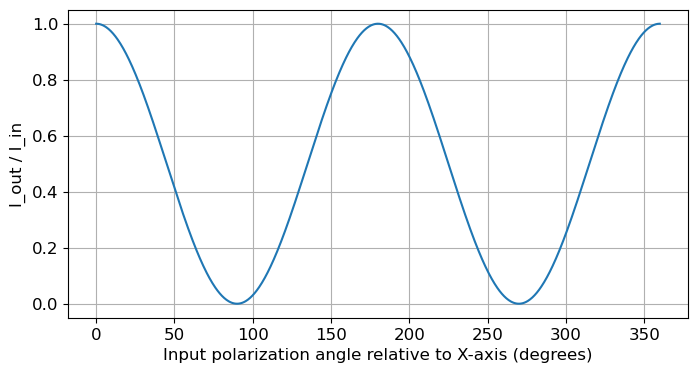

In [17]:
Ein = np.array([[1],[0]])   # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

# Loop over input polarization angles.
for theta in thetavec:
    
    # Build the rotation matrix
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    
    # Rotate Ein
    E1 = np.matmul(R,Ein)
    
    # Run E1 into the polarizer described by M1
    E2 = np.matmul(P1,E1)
    
    # Calculate the total intensity
    I = np.vdot(E2,E2)
    
    # Save for plotting
    Ivec = np.append(Ivec,I)

# Make a plot
plt.plot(thetavec_deg,Ivec)
plt.xlabel('Input polarization angle relative to X-axis (degrees)')
plt.ylabel('I_out / I_in')
plt.grid()

# 2 polarizers, one rotating
Here we have an input x-polarized beam, which hits a rotating polarizer, after which the beam passes through a fixed y-polarizer.

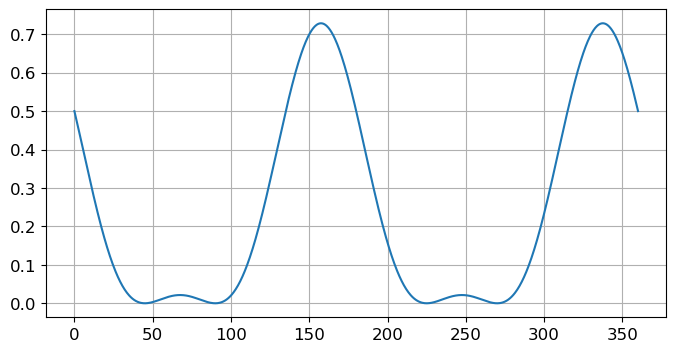

In [14]:
Ein = np.array([[1],[0]])   # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)
#P2 = np.array([[0,0],[0,1]])  # Jones matrix for a horizontal polarizer
P2 = 0.5*np.array([[1,1],[1,1]]) # Jones matrix for a 45deg polarizer

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

for theta in thetavec:
    # Build rotation matrix and its inverse.
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    Rinv = np.array([[cost, sint],[-sint, cost]])
    
    # Run Ein through the rotated polarizer    
    Erot = np.matmul(R,Ein)   #   Rotate E into basis of polarizer, 
    E2 = np.matmul(P1,Erot)   #   go through polarizer, 
    E2o = np.matmul(Rinv,E2)  #   rotate E back into original basis.
    
    # Run resulting E through the final polarizer
    E3 = np.matmul(P2,E2o)
    
    # Calculate intensity
    I = np.vdot(E3,E3)
    Ivec = np.append(Ivec,I)

plt.plot(thetavec_deg,Ivec)
plt.grid()
    
    

# Rotating HWP example

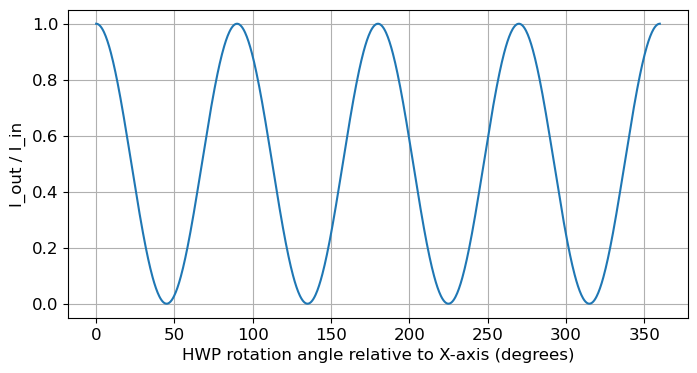

In [16]:
Ein = np.array([[1],[0]])   # input polarized in x direction
HWP = np.array([[np.exp(1j*np.pi),0],[0,1]])  # Jones matrix for a horizontal polarizer (x direction)
P1 = np.array([[1,0],[0,0]])

thetavec_deg = np.linspace(0,360,1000)
thetavec = thetavec_deg*np.pi/180.
Ivec = np.array([])

# Loop over input polarization angles.
for theta in thetavec:
    
    # Build the rotation matrix
    sint = np.sin(theta)
    cost = np.cos(theta)
    R = np.array([[cost, -sint],[sint, cost]])
    Rinv = np.linalg.inv(R)
    
    # Rotate Ein
    E1 = np.matmul(R,Ein)
    
    # Run E1 into the polarizer described by M1
    E2 = np.matmul(HWP,E1)

    # Rotate back to the original coordinate frame
    E3 = np.matmul(Rinv,E2)

    # Apply the final polarizer
    E4 = np.matmul(P1, E3)
    
    # Calculate the intensity
    I = np.vdot(E4,E4)
    
    # Save for plotting
    Ivec = np.append(Ivec,I)

# Make a plot
plt.plot(thetavec_deg,Ivec)
plt.xlabel('HWP rotation angle relative to X-axis (degrees)')
plt.ylabel('I_out / I_in')
plt.grid()

# Toptica Terascan system

This is trickier in that it does not detect intensity.  Instead the photocurrent in the receiving antenna as given by 
(see https://www.toptica.com/fileadmin/Editors_English/12_literature/03_terahertz/toptica_coherent_broadband_continuous-wave_terahertz_spectroscopy_on_solid-state_samples.pdf)

$$ I_{ph} \propto E_{THz} \cos{(\Delta \phi)} $$, 
where $\Delta \phi$ is the phase difference between the THz optical path and the fiber path, and E_{THz} is the E field amplitude of the wave from the THz path.  We can also express the phase difference in terms of the optical path length difference $\Lambda$ and the THz frequency,

$$ \Delta \phi = 2\pi \frac{\Delta \Lambda}{\lambda_0} ,$$
where $\lambda_0$ is the free-space wavelength.


## Toptica example 1 - perfect HWP, for a few different THz path phase differences

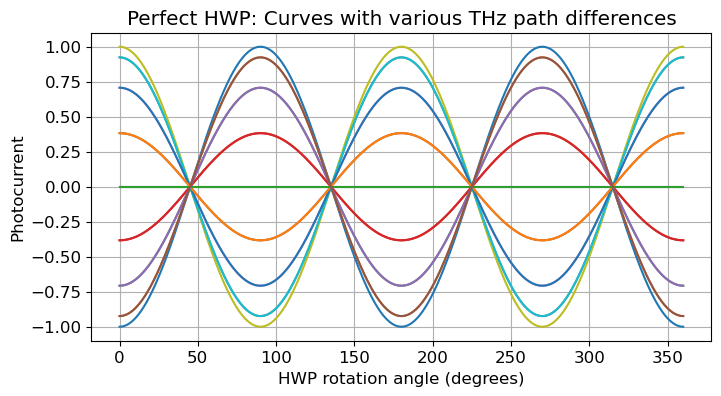

In [18]:

Ein = np.array([[1],[0]])    # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)
HWP = np.array( [[np.exp(1j*np.pi), 0],[0,1]])


thetavec_deg = np.linspace(0,360,1000)

deltaphivec = np.arange(0,2*np.pi, np.pi/8)
#
for deltaphi in deltaphivec: 
    Mphase = [ [ np.exp(1j*deltaphi), 0], [0, np.exp(1j*deltaphi)] ]
    thetavec = thetavec_deg*np.pi/180.
    Ivec = np.array([])
    # Loop over input polarization angles.
    for theta in thetavec:
        # Build the rotation matrix
        sint = np.sin(theta)
        cost = np.cos(theta)
        R = np.array([[cost, -sint],[sint, cost]])
        Rinv = np.linalg.inv(R)
        
        # Rotate E1 into the HWP's basis
        E2 = np.matmul(R,Ein)
        # Run E2 into the HWP
        E3 = np.matmul(HWP,E2)
        # Rotate back 
        E4 = np.matmul(Rinv,E3)
    
        # Now put in the phase delay to both x and y components
        E5 = np.matmul(Mphase,E4)
    
        # Apply a final polarized detector
        E6 = np.matmul(P1,E5)
        
        # Calculate the photocurrent
        Irec = np.real(np.vdot(Ein,E6))
        
        # Save for plotting
        Ivec = np.append(Ivec,Irec)
    # Make a plot
    plt.plot(thetavec_deg,Ivec)
    
plt.xlabel('HWP rotation angle (degrees)')
plt.ylabel('Photocurrent')
plt.title('Perfect HWP: Curves with various THz path differences')
plt.grid()

## Toptica example 2 - 

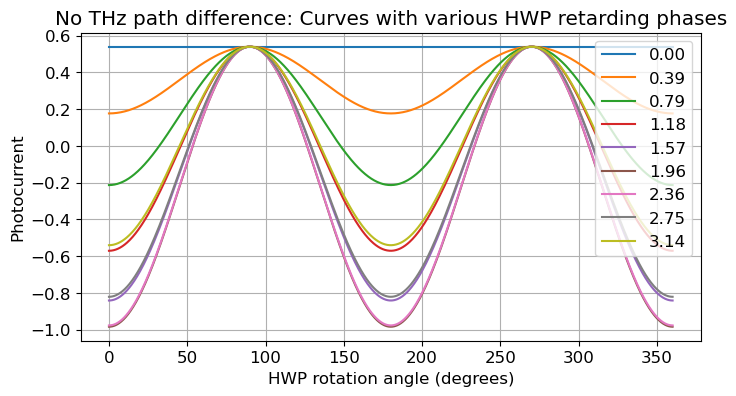

In [19]:
deltaphi = 1
Mphase = [ [ np.exp(1j*deltaphi), 0], [0, np.exp(1j*deltaphi)] ]

Ein = np.array([[1],[0]])    # input polarized in x direction
P1 = np.array([[1,0],[0,0]])  # Jones matrix for a horizontal polarizer (x direction)
thetavec_deg = np.linspace(0,360,1000)

deltaphivec = np.arange(0,np.pi+0.001, np.pi/8)
#
for deltaphi in deltaphivec: 
    HWP = np.array( [[np.exp(1j*deltaphi), 0],[0,1]])
    thetavec = thetavec_deg*np.pi/180.
    Ivec = np.array([])
    # Loop over input polarization angles.
    for theta in thetavec:
        # Build the rotation matrix
        sint = np.sin(theta)
        cost = np.cos(theta)
        R = np.array([[cost, -sint],[sint, cost]])
        Rinv = np.linalg.inv(R)
        
        # Rotate E1 into the HWP's basis
        E2 = np.matmul(R,Ein)
        # Run E2 into the HWP
        E3 = np.matmul(HWP,E2)
        # Rotate back 
        E4 = np.matmul(Rinv,E3)
    
        # Now put in the phase delay to both x and y components
        E5 = np.matmul(Mphase,E4)
    
        # Apply a final polarized detector
        E6 = np.matmul(P1,E5)
        
        # Calculate the photocurrent
        Irec = np.real(np.vdot(Ein,E6))
        
        # Save for plotting
        Ivec = np.append(Ivec,Irec)
    # Make a plot
    dphistring=f'{deltaphi:0.2f}'
    plt.plot(thetavec_deg,Ivec,label=dphistring)
    
plt.xlabel('HWP rotation angle (degrees)')
plt.ylabel('Photocurrent')
plt.title('No THz path difference: Curves with various HWP retarding phases')
plt.legend()
plt.grid()